referensi:
1. https://python.plainenglish.io/text-mining-in-python-steps-and-examples-645b16c6bc5d
2. https://www.iwebdatascraping.com/how-to-scrape-news-content-from-popular-news-sites.php
3. https://medium.com/@danielwume/getting-started-with-nltk-10-essential-examples-for-natural-language-processing-in-python-54451eae1366
4. https://www.askpython.com/python/examples/text-mining-in-python
5. ChatGPT

1. Pengumpulan Data

1.1. install packages
*   requests: untuk membantu proses scrapping data
*   beautifulsoup4: untuk membantu proses scrapping data
*   urllib3: modul yg berguna dalam menangani URL


In [ ]:
!pip install nltk requests matplotlib wordcloud beautifulsoup4 urllib3

1.2. import libraries

In [ ]:
from bs4 import BeautifulSoup
import urllib.request, sys, time
import requests
import pandas as pd

1.3. fetch a page content

In [ ]:
def getHtmlContent( page_url ):
  # might throw an exception if something goes wrong
  try:
    page_response = requests.get( page_url )

  # what to do if an exception is thrown
  except Exception as e:

    # get exception information
    error_type, error_obj, error_info = sys.exc_info()

    # print the link that cause the problem
    print( "Error for link: ", page_url )

    # print error info and line that threw the exception
    print( error_type, "Line:", error_info.tb_lineno )
  # end try

  # print response object
  return page_response
# end function

1.4 get number of pages

In [ ]:
# main page
main_page_url = 'https://news.detik.com/berita/indeks/1?date=03/27/2024'
main_page_response = getHtmlContent( main_page_url )
# main_page_url.status_code

# parse html using beautifulsoup
main_soup = BeautifulSoup( main_page_response.text, "html.parser" )

# get all pages links
navigation_div = main_soup.find_all( 'a', attrs={ "class": "pagination__item" } )

# Extract the last page number
last_page_link = int( navigation_div[-2].text )
last_page_link

11

1.5 get every page news links

In [ ]:
# # for testing only
# last_page_link = 1

In [ ]:
# the base url link
base_url = 'https://news.detik.com/berita/indeks/'

# vessel for all collected page text
raw_scrapped_links = []
# Iterate through page numbers from 1 to last_page_link
for page_number in range( 1, last_page_link+1 ):
    # Construct the URL for each page
    current_page_url = f"{base_url}{page_number}?date=03/27/2024"

    # collect data for every page
    current_page_response = getHtmlContent( current_page_url )

    # only collect if current page response is 200
    if current_page_response.status_code == 200:
      # check for response page number
      print( "Yes, Scarpe page", page_number )

      # extracting content from collected html using BeautifulSoup
      soup = BeautifulSoup( current_page_response.text, "html.parser" )

      # filter data based on their tag / class / id / element
      raw_data = soup.find_all( 'article', attrs={ "class":"list-content__item" } )

      # check number of filtered data
      print( "number of news collected: ", len( raw_data ) )

      # colect news link only
      for one_news in raw_data:
        # extract news link
        news_link = one_news.find( "a", attrs={ "class": "media__link" } ).get( "href" )

        # add to final array
        raw_scrapped_links.append( news_link )
      # end loop

      # delay request time
      time.sleep(2)
    # end if
# end loop

# check number of scrapped data
print( len( raw_scrapped_links ) )

Yes, Scarpe page 1
number of news collected:  20
Yes, Scarpe page 2
number of news collected:  20
Yes, Scarpe page 3
number of news collected:  20
Yes, Scarpe page 4
number of news collected:  20
Yes, Scarpe page 5
number of news collected:  20
Yes, Scarpe page 6
number of news collected:  20
Yes, Scarpe page 7
number of news collected:  20
Yes, Scarpe page 8
number of news collected:  20
Yes, Scarpe page 9
number of news collected:  20
Yes, Scarpe page 10
number of news collected:  20
Yes, Scarpe page 11
number of news collected:  9
209


In [ ]:
# # check collected links form
# print( raw_scrapped_links[0] )
# print( raw_scrapped_links[1] )

1.6 collect add contents from collected news links

In [ ]:
# to help extract text of news html
def extract_news_text( news_body ):
  # final collected news result
  final_result = []

  # get all text from tag p
  text_raw = news_body.find_all( "p", class_=lambda x: x != "para_caption" and x != "embed video20detik" )

  # keywords exception
  keywords_except = ["simak video", "saksikan live", "halaman berikutnya"]

  # check all collected text lines
  for news_line in text_raw:
    # try to detect any video links
    video_links = news_line.find_all( "a", attrs={"id": "idvideo20detik"} )
    page_number = news_line.find_all( 'div', class_='detail__multiple' )

    # if current line writen as a list
    if ( not video_links and not page_number and news_line.find( 'br' ) ):
      news_text_raw = news_line.get_text( separator="\n" )
      news_text_arr = news_text_raw.split( "\n" )

      # loop all text from list
      for one_txt in news_text_arr:
        # Check if the string does not contain certain keywords
        if len( one_txt ) > 0 and one_txt!=" " and not any( keyword.lower() in one_txt.lower() for keyword in keywords_except ):
          # insert current news line into final array
          final_result.append( one_txt.strip() )
        # end if
      # end loop
    elif ( not video_links and not page_number ):
      # get current text
      news_text = news_line.text

      # Check if the string does not contain certain keywords
      if len( news_text ) > 0 and news_text!=" " and not any( keyword.lower() in news_text.lower() for keyword in keywords_except ):
        # insert current news line into final array
        final_result.append( news_text.strip() )
      # end if
    # end if
  # end loop

  # return all collected news paragraph
  return final_result
# end function

In [ ]:
import html

# vessel of array for new form of data
all_data = []

# from the collected data, loop all the data and extract it into new data
for news_url in raw_scrapped_links:
  # set empty vessel for one data
  one_product = {}

  # collect news content from current extracted news url
  # parse html using beautifulsoup
  news_soup = BeautifulSoup( getHtmlContent( news_url ).text, "html.parser" )

  # filter data based on their tag / class / id / element
  news_content_raw = news_soup.find( 'article', attrs={ "class":"detail" } )

  # extract news header content
  news_header = news_content_raw.find( attrs={"class": "detail__header"} )
  # get news title
  news_title        = news_header.find( attrs={"class": "detail__title"} ).text
  # get news author
  news_author_info  = news_header.find( attrs={"class": "detail__author"} ).text
  news_author_array = news_author_info.split(' - ')
  news_author       = news_author_array[0]
  news_division     = news_author_array[1]

  # get news published date
  news_date         = news_header.find( attrs={"class": "detail__date"} ).text

  # extract news media content
  news_media        = news_content_raw.find( "div", attrs={"class": "detail__media"} )
  news_img_src      = news_media.find( "img" )
  news_img_src      = news_img_src.get( 'src' ) if news_img_src else "N/A"
  news_img_caption  = news_media.find( "figcaption", attrs={"class": "detail__media-caption"} )
  news_img_caption  = news_img_caption.text if news_img_caption else "N/A"

  # extract news body
  news_body         = news_content_raw.find( "div", attrs={"class": "detail__body-text itp_bodycontent"} )
  # extract news location
  news_location     = news_body.find( "strong" ).text

  # extract news text
  news_description_final = []
  news_detail_multiple_pages = news_body.find( "div", attrs={"class": "detail__multiple"} )

  # if news content separated into different pages, then
  if news_detail_multiple_pages:

    # ambil semua link berita tiap detil halaman
    array_details = news_detail_multiple_pages.find_all( "a", {"class": "detail__anchor-numb"} )
    for news_detail_page in array_details:
      # get current detil page url
      detil_url = news_detail_page.get( "href" )

      # get all news paragraph
      detil_soup = BeautifulSoup( getHtmlContent( detil_url ).text, "html.parser" )
      detil_body = detil_soup.find( "div", attrs={"class": "detail__body-text itp_bodycontent"} )

      # store result
      news_description_final.extend( extract_news_text( detil_body ) )
    # end if
  else:
    # store result
    news_description_final = extract_news_text( news_body )
  # end if

  # extract news tag(s)
  news_tags_raw = news_body.find_all( attrs={"class": "nav__item"} )
  news_tags_final = []
  for tags in news_tags_raw:
    news_tags_final.append( tags.get( "dtr-ttl" ) )
  # end loop

  # combine all values into one data with their specific key
  one_product['judul']            = news_title.strip()
  one_product['link']             = news_url
  one_product['penulis']          = news_author
  one_product['divisi']           = news_division
  one_product['waktu_publikasi']  = news_date
  one_product['ilustrasi_gambar'] = news_img_src
  one_product['ilustrasi_caption']= news_img_caption.strip()
  one_product['lokasi_berita']    = news_location
  one_product['teks_berita']      = news_description_final
  one_product['tagar_berita']     = news_tags_final

  # appen data to final product list
  all_data.append( one_product )
# end loop

# check numbers of filtered data
print( "number of all_data: ", len( all_data ) )

number of all_data:  209


In [ ]:
# check nilai
for idx in range( 0, 4 ):
  one_data = all_data[ idx ]
  print( "judul:", one_data['judul'] )
  print( "link berita:", one_data['link'] )
  print( "tagar_berita:", one_data['tagar_berita'] )
# end loop

judul: Kejagung Jelaskan Kaitan Harvey Moeis dengan Helena Lim di Kasus Timah
link berita: https://news.detik.com/berita/d-7265364/kejagung-jelaskan-kaitan-harvey-moeis-dengan-helena-lim-di-kasus-timah
tagar_berita: ['korupsi timah', 'harvey moeis tersangka korupsi timah', 'kasus korupsi timah', 'harvey moeis', 'harvey moeis ditahan', 'harvey moeis suami sandra dewi', 'harvey moeis tersangka']
judul: Menko Polhukam Bentuk Tim Khusus Tangani Mahasiswa Korban TPPO Ferienjob
link berita: https://news.detik.com/berita/d-7265345/menko-polhukam-bentuk-tim-khusus-tangani-mahasiswa-korban-tppo-ferienjob
tagar_berita: ['menko polhukam', 'hadi tjahjanto', 'tppo', 'tindak pidana perdagangan orang', 'ferienjob', 'ferienjob jerman', 'magang ferienjob ke jerman', 'magang']
judul: Petani Musi Banyuasin Tewas Diterkam Buaya Saat Wudu di Sungai Biduk
link berita: https://news.detik.com/berita/d-7265342/petani-musi-banyuasin-tewas-diterkam-buaya-saat-wudu-di-sungai-biduk
tagar_berita: ['buaya', 'warga d

1.7 save collected data into a csv and excel file

In [ ]:
import pandas as pd
import csv

# turn collected data in form of dataframe
df = pd.DataFrame( all_data )
df.head( 10 ) # list the first 20 rows

# export collected data into excel file
df.to_excel( 'news_data_03272024.xlsx', index=False )

# export collected data into csv file
df.to_csv( 'news_data_03272024.csv', index=False )

2. Pra process data

ref: https://medium.com/@maleeshadesilva21/preprocessing-steps-for-natural-language-processing-nlp-a-beginners-guide-d6d9bf7689c9

2.1 install packages
*   numpy: untuk mengolah data berbentuk array
*   pandas: untuk memanipulasi dan membantu analisis data pada pemrograman python
*   matplotlib: untuk visualisasi data dalam bentuk graf atau chart
*   wordcloud: untuk visualisasi data berbentuk kata

In [ ]:
!pip install nltk pandas numpy matplotlib

2.2 Import libraries

In [ ]:
import codecs
import collections

import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib

2.3 open and read data file using pandas

In [ ]:
import ast

# Custom converter function to safely parse list values
def parse_list(s):
    try:
        return ast.literal_eval(s)
    except (SyntaxError, ValueError):
        return None  # Handle invalid list representations
    # end try
# end function

In [ ]:
# try to open csv file
# df = pd.read_csv( 'news_data_03272024.csv' )
# khusus column teks berita yg berbentuk list
df = pd.read_csv( 'news_data_03272024.csv', converters={ "teks_berita": parse_list } )

In [ ]:
# display 5 random data
df.sample( 5 )

,judul,link,penulis,divisi,waktu_publikasi,ilustrasi_gambar,ilustrasi_caption,lokasi_berita,teks_berita,tagar_berita
83,Polres Malang Edukasi Supeltas Sambil Bukber d...,https://news.detik.com/berita/d-7264516/polres...,Fajar Pratama,detikNews,"Rabu, 27 Mar 2024 15:25 WIB",https://awsimages.detik.net.id/community/media...,Satlantas Polres Malang membina sukarelawan pe...,Malang,[Satuan Lalu Lintas (Satlantas) Polres Malang ...,"['polres malang', 'teman mudik 2024', 'supelta..."
108,Kasus Demam Berdarah Dengue di Depok Capai 328...,https://news.detik.com/berita/d-7264217/kasus-...,Devi Puspitasari,detikNews,"Rabu, 27 Mar 2024 13:46 WIB",https://awsimages.detik.net.id/community/media...,Ilustrasi nyamuk Aedes aegypti penyebab penyak...,Depok,[Sedikitnya 328 orang per Februari 2024 terken...,"['jabodetabek', 'depok', 'demam berdarah dengu..."
37,Program Magang ke Jepang Diklaim Tingkatkan Sk...,https://news.detik.com/berita/d-7264935/progra...,Jihaan Khoirunnisa,detikNews,"Rabu, 27 Mar 2024 17:53 WIB",https://awsimages.detik.net.id/community/media...,Foto: Kemnaker,Jakarta,[Menteri Ketenagakerjaan (Menaker) Ida Fauziya...,"['kemnaker', 'tenaga kerja']"
88,Pemkab Lebak Pastikan Stok-Harga Bahan Pokok S...,https://news.detik.com/berita/d-7264477/pemkab...,Fathul Rizkoh,detikNews,"Rabu, 27 Mar 2024 15:15 WIB",https://awsimages.detik.net.id/community/media...,Foto: Ilustrasi bahan pokok (dok. Kemendag).,Lebak,[Penjabat Bupati Lebak Iwan Kurniawan memastik...,"['pemkab lebak', 'lebak', 'banten', 'lebaran',..."
65,Bareskrim Beberkan 3 Tersangka TPPO Ferienjob ...,https://news.detik.com/berita/d-7264715/baresk...,Rumondang Naibaho,detikNews,"Rabu, 27 Mar 2024 16:24 WIB",https://awsimages.detik.net.id/community/media...,Direktur Tindak Pidana Umum (Dirtipidum) Bares...,Jakarta,[Direktur Tindak Pidana Umum (Dirtipidum) Bare...,"['ferienjob', 'ferienjob adalah', 'ferienjob j..."


In [ ]:
# display all features name and datatype
df.dtypes

judul                object
link                 object
penulis              object
divisi               object
waktu_publikasi      object
ilustrasi_gambar     object
ilustrasi_caption    object
lokasi_berita        object
teks_berita          object
tagar_berita         object
dtype: object

In [ ]:
# Using DataFrame.copy() create new DaraFrame
df_data = df[ [ 'judul', 'teks_berita' ] ].copy()
df_data['teks_berita'] = df_data['teks_berita'].tolist()
# df_data[ 'count_paragraph' ] = df_data[ 'teks_berita' ].apply( lambda words: len( words ) )

# merge news text from per paragraph into one text value
df_data[ 'teks_berita' ] = df_data[ 'teks_berita' ].apply( lambda words: ' '.join( words ) )

# check selected values
df_data.sample( 5 )

,judul,teks_berita
82,Sederet Upaya Kemnaker Dorong Pembayaran THR k...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...
131,Apa itu Ferienjob terkait Kasus TPPO Mahasiswa...,Bareskrim Polri mengungkap tindak pidana perda...
107,Polisi: Sopir dan Kernet Sengaja Campur Bensin...,Polisi memeriksa sejumlah orang terkait kasus ...
128,"4 Stasiun Keberangkatan KA Lebaran: Senen, Gam...",Kementerian Perhubungan (Kemenhub) menambah st...
170,Jasa Marga: Kecelakaan Beruntun di GT Halim Ak...,Kecelakaan beruntun melibatkan sejumlah kendar...


2.4 Text cleaning

In [ ]:
import nltk

In [ ]:
# i) converting to lowercase
df_data[ 'cleaned_judul' ]  = df_data[ 'judul' ].apply( lambda words: words.lower() if isinstance( words, str ) else words ).copy()
df_data[ 'cleaned_berita' ] = df_data[ 'teks_berita' ].apply( lambda words: words.lower() if isinstance( words, str ) else words ).copy()

# ii) removing url using regex
import re
url_pattern = re.compile(r'https?://\S+')
df_data[ 'cleaned_judul' ]  = df_data[ 'cleaned_judul' ].apply( lambda words: url_pattern.sub( '', words ) )
df_data[ 'cleaned_berita' ] = df_data[ 'cleaned_berita' ].apply( lambda words: url_pattern.sub( '', words ) )

# iii) remove non-word and non-whitespace char
df_data[ 'cleaned_judul' ]  = df_data[ 'cleaned_judul' ].replace( to_replace=r'[^\w\s]', value='', regex=True )
df_data[ 'cleaned_berita' ] = df_data[ 'cleaned_berita' ].replace( to_replace=r'[^\w\s]', value='', regex=True )

# iv) remove digits
df_data[ 'cleaned_judul' ]  = df_data[ 'cleaned_judul' ].replace( to_replace=r'\d', value='', regex=True )
df_data[ 'cleaned_berita' ] = df_data[ 'cleaned_berita' ].replace( to_replace=r'\d', value='', regex=True )

# check values
df_data[ [ 'cleaned_judul', 'cleaned_berita' ] ].head( 5 )

,cleaned_judul,cleaned_berita
0,kejagung jelaskan kaitan harvey moeis dengan h...,kejaksaan agung kejagung menuturkan peran suam...
1,menko polhukam bentuk tim khusus tangani mahas...,menko polhukam hadi tjahjanto menegaskan jajar...
2,petani musi banyuasin tewas diterkam buaya saa...,samsudin seorang petani di musi banyuasin sum...
3,waka mpr minta ada upaya buat antisipasi gangg...,wakil ketua mpr ri lestari moerdijat menyebut ...
4,tak balasbalas wa pria di mampang ditemukan te...,pria bernama sandy yuda ditemukan tewas di da...


2.5 Tokenization

In [ ]:
# get tokenizer libraries
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# apply tokenization
df_data[ 'tokenized_judul' ]  = df_data[ 'cleaned_judul' ].apply( word_tokenize ).copy()
df_data[ 'tokenized_berita' ] = df_data[ 'cleaned_berita' ].apply( word_tokenize ).copy()

# check values
df_data[ [ 'tokenized_judul', 'tokenized_berita' ] ].head( 5 )

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,tokenized_judul,tokenized_berita
0,"[kejagung, jelaskan, kaitan, harvey, moeis, de...","[kejaksaan, agung, kejagung, menuturkan, peran..."
1,"[menko, polhukam, bentuk, tim, khusus, tangani...","[menko, polhukam, hadi, tjahjanto, menegaskan,..."
2,"[petani, musi, banyuasin, tewas, diterkam, bua...","[samsudin, seorang, petani, di, musi, banyuasi..."
3,"[waka, mpr, minta, ada, upaya, buat, antisipas...","[wakil, ketua, mpr, ri, lestari, moerdijat, me..."
4,"[tak, balasbalas, wa, pria, di, mampang, ditem...","[pria, bernama, sandy, yuda, ditemukan, tewas,..."


2.6 Stopword removal

In [ ]:
# get stopword libraries
nltk.download('stopwords')
from nltk.corpus import stopwords

# load stopwords
stopwords_ind = stopwords.words( 'indonesian' )

# apply stopwords removal
df_data[ 'stopremoved_judul' ]  = df_data[ 'tokenized_judul' ].apply( lambda words: [ word for word in words if word not in stopwords_ind ] ).copy()
df_data[ 'stopremoved_berita' ] = df_data[ 'tokenized_berita' ].apply( lambda words: [ word for word in words if word not in stopwords_ind ] ).copy()

# check values
df_data[ [ 'stopremoved_judul', 'stopremoved_berita' ] ].head( 5 )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,stopremoved_judul,stopremoved_berita
0,"[kejagung, kaitan, harvey, moeis, helena, lim,...","[kejaksaan, agung, kejagung, peran, suami, akt..."
1,"[menko, polhukam, bentuk, tim, khusus, tangani...","[menko, polhukam, hadi, tjahjanto, jajaran, le..."
2,"[petani, musi, banyuasin, tewas, diterkam, bua...","[samsudin, petani, musi, banyuasin, sumatera, ..."
3,"[waka, mpr, upaya, antisipasi, gangguan, mudik...","[wakil, ketua, mpr, ri, lestari, moerdijat, me..."
4,"[balasbalas, wa, pria, mampang, ditemukan, tew...","[pria, bernama, sandy, yuda, ditemukan, tewas,..."


2.7.1 Stemming

In [ ]:
# install Sastrawi to be able to do stemming indonesian text
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize
# # initialize the porter stemmer
# stemmer = PorterStemmer()

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create a stemmer object
stemmer = StemmerFactory().create_stemmer()

# apply stemming on the text column
df_data[ 'stemming_judul' ]  = df_data[ 'stopremoved_judul' ].apply( lambda words: [ stemmer.stem( word ) for word in words ] ).copy()
df_data[ 'stemming_berita' ] = df_data[ 'stopremoved_berita' ].apply( lambda words: [ stemmer.stem( word ) for word in words ] ).copy()

# check values
df_data[ [ 'stemming_judul', 'stemming_berita' ] ].head( 5 )

,stemming_judul,stemming_berita
0,"[jagung, kait, harvey, moeis, helena, lim, timah]","[jaksa, agung, jagung, peran, suami, aktris, s..."
1,"[menko, polhukam, bentuk, tim, khusus, tangan,...","[menko, polhukam, had, tjahjanto, jajar, lemba..."
2,"[tani, mus, banyuasin, tewas, terkam, buaya, w...","[samsudin, tani, mus, banyuasin, sumatera, sel..."
3,"[waka, mpr, upaya, antisipasi, ganggu, mudik, ...","[wakil, ketua, mpr, ri, lestari, moerdijat, se..."
4,"[balasbalas, wa, pria, mampang, temu, tewas, k...","[pria, nama, sandy, yuda, temu, tewas, koskosa..."


2.7.2 Lemmatization

In [ ]:
nltk.download( 'averaged_perceptron_tagger' )
nltk.download( 'wordnet' )

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import pandas as pd

# initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# convert POS tag into WordNet format
def get_wordnet_pos( word ):
  tag = nltk.pos_tag( [word] )[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ,
              "N": wordnet.NOUN,
              "V": wordnet.VERB,
              "J": wordnet.ADV}
  return tag_dict.get( tag, wordnet.NOUN )
# end function

# apply lemmatization to column of dataframe
df_data[ 'lemma_judul' ]  = df_data[ 'stopremoved_judul' ].apply( lambda words: [ lemmatizer.lemmatize( word, get_wordnet_pos( word ) ) for word in words ] ).copy()
df_data[ 'lemma_berita' ] = df_data[ 'stopremoved_berita' ].apply( lambda words: [ lemmatizer.lemmatize( word, get_wordnet_pos( word ) ) for word in words ] ).copy()

# check values
df_data[ [ 'lemma_judul', 'lemma_berita' ] ].head( 5 )

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,lemma_judul,lemma_berita
0,"[kejagung, kaitan, harvey, moeis, helena, lim,...","[kejaksaan, agung, kejagung, peran, suami, akt..."
1,"[menko, polhukam, bentuk, tim, khusus, tangani...","[menko, polhukam, hadi, tjahjanto, jajaran, le..."
2,"[petani, musi, banyuasin, tewas, diterkam, bua...","[samsudin, petani, musi, banyuasin, sumatera, ..."
3,"[waka, mpr, upaya, antisipasi, gangguan, mudik...","[wakil, ketua, mpr, ri, lestari, moerdijat, me..."
4,"[balasbalas, wa, pria, mampang, ditemukan, tew...","[pria, bernama, sandy, yuda, ditemukan, tewas,..."


2.8 save the processed text into a new file

In [ ]:
import pandas as pd
import csv

# selected dataframe
getData = df_data[ [ 'judul', 'teks_berita', 'stopremoved_judul', 'stopremoved_berita', 'stemming_judul', 'stemming_berita', 'lemma_judul', 'lemma_berita'] ]

# export pre processed data into excel file
getData.to_excel( 'news_data_03272024-preprocessed.xlsx', index=False )

# export pre processed collected data into csv file
getData.to_csv( 'news_data_03272024-preprocessed.csv', index=False )

3. Exploratory Data Analysis

ref: https://python.plainenglish.io/text-mining-in-python-steps-and-examples-645b16c6bc5d

In [ ]:
import ast

# Custom converter function to safely parse list values
def parse_list(s):
    try:
        return ast.literal_eval(s)
    except (SyntaxError, ValueError):
        return None  # Handle invalid list representations
    # end try
# end function

In [ ]:
# try to open previous saved pre processed data
import numpy as np
import pandas as pd

# open file to get the data
df_pre = pd.read_csv( 'news_data_03272024-preprocessed.csv', converters={ "teks_berita": parse_list,
                                                                        "stopremoved_judul": parse_list,
                                                                        "stopremoved_berita": parse_list,
                                                                        "lemma_judul": parse_list,
                                                                        "lemma_berita": parse_list,
                                                                        "stemming_judul": parse_list,
                                                                        "stemming_berita": parse_list
                                                                        } )

# create new dataframe for lemma pre processed data
df_eda_1 = pd.DataFrame()
df_eda_1[ 'words_judul' ]  = df_pre[ 'lemma_judul' ].copy()
df_eda_1[ 'words_berita' ] = df_pre[ 'lemma_berita' ].copy()

# create new dataframe for stemming pre processed data
df_eda_2 = pd.DataFrame()
df_eda_2[ 'words_judul' ]  = df_pre[ 'stemming_judul' ].copy()
df_eda_2[ 'words_berita' ] = df_pre[ 'stemming_berita' ].copy()

# create new dataframe for cleaned pre processed data
df_eda_3 = pd.DataFrame()
df_eda_3[ 'words_judul' ]  = df_pre[ 'stopremoved_judul' ].copy()
df_eda_3[ 'words_berita' ] = df_pre[ 'stopremoved_berita' ].copy()

In [ ]:
# # try to check data of all df
# df_eda_1.head( 5 )
# df_eda_2.head( 5 )
# df_eda_3.head( 5 )

3.1 generate word cloud from all df eda


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def createWordCloud( df_one_column_value ):
  # flat the values of judul
  clean_judul_flat_arr = [ word for sublist in df_one_column_value for word in sublist ]
  clean_judul_flat_text = " ".join( clean_judul_flat_arr )

  # create a word cloud for judul
  wordcloud_judul = WordCloud( width=800, height=400 ).generate( clean_judul_flat_text )

  # display the word cloud for judul
  plt.figure( figsize=( 10, 5 ) )
  plt.imshow( wordcloud_judul, interpolation='bilinear' )
  plt.axis( "off" )
  plt.show()
# end function

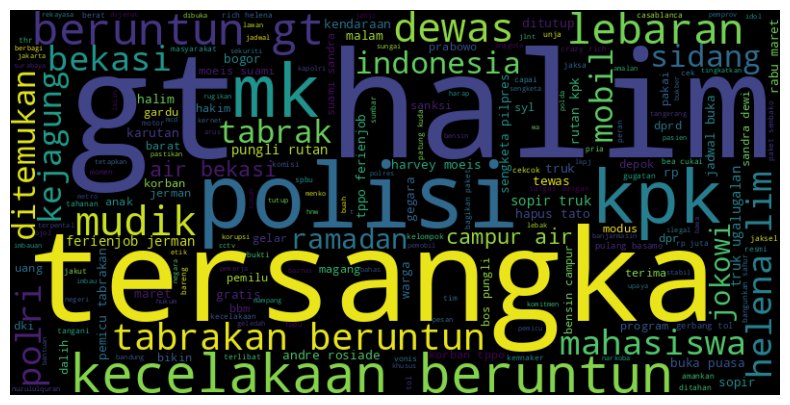

In [ ]:
# show wrodcloud for df eda 1 judul
createWordCloud( df_eda_1['words_judul'].copy() )

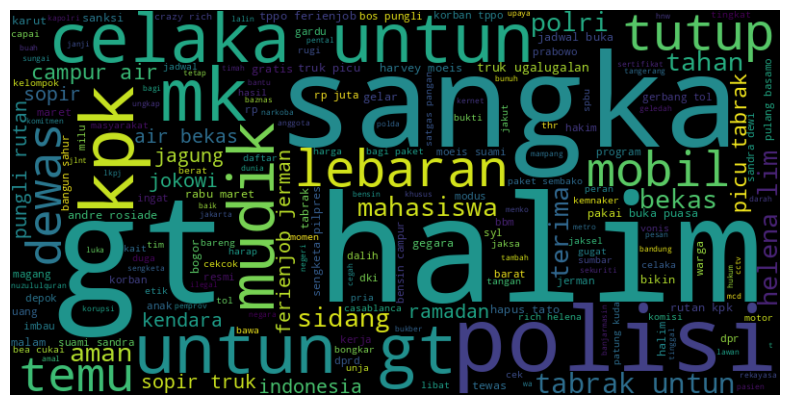

In [ ]:
# show wrodcloud for df eda 2 judul
createWordCloud( df_eda_2['words_judul'].copy() )

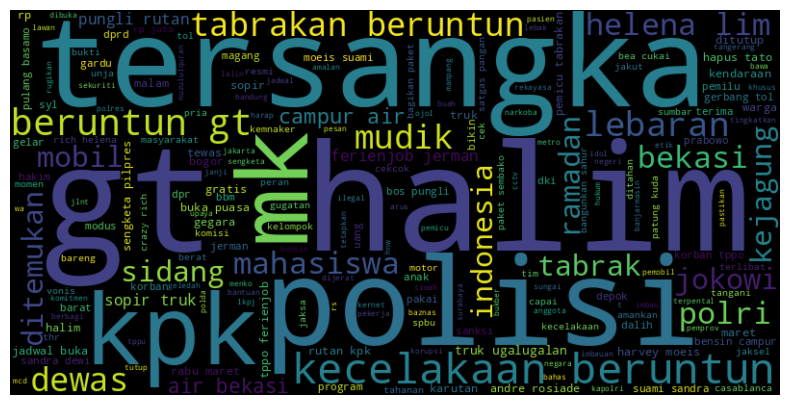

In [ ]:
# show wrodcloud for df eda 3 judul
createWordCloud( df_eda_3['words_judul'].copy() )

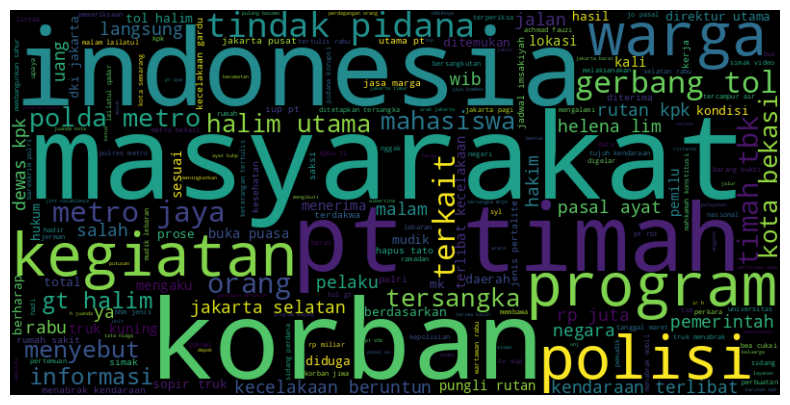

In [ ]:
# show wrodcloud for df eda 1 berita
createWordCloud( df_eda_1['words_berita'].copy() )

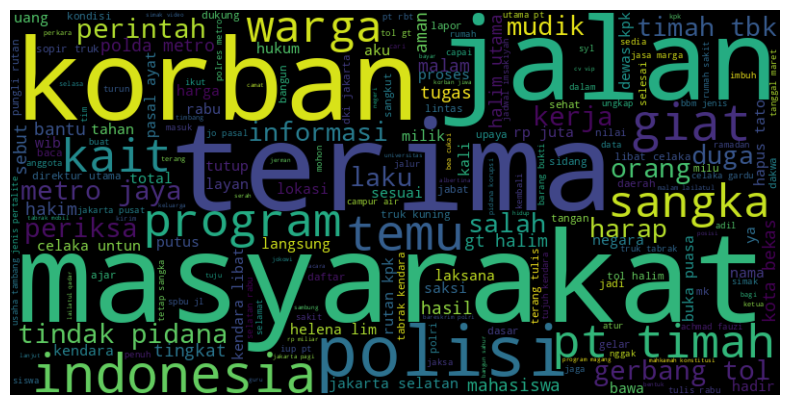

In [ ]:
# show wrodcloud for df eda 2 berita
createWordCloud( df_eda_2['words_berita'].copy() )

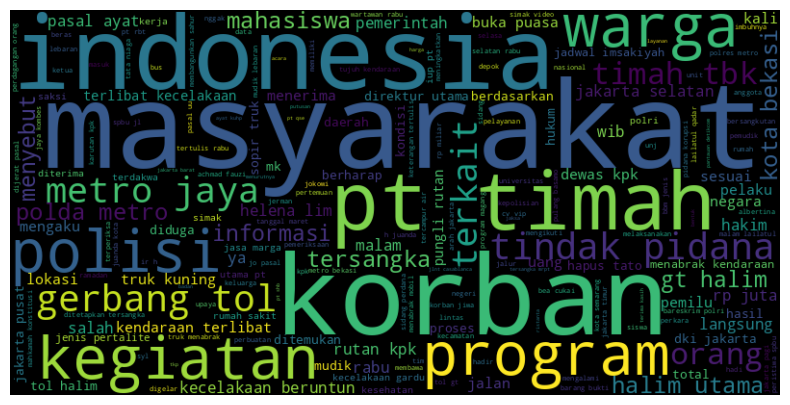

In [ ]:
# show wrodcloud for df eda 3 berita
createWordCloud( df_eda_3['words_berita'].copy() )

3.2 generate histogram of word frequencies from all df eda

ref: https://absentdata.com/python-graphs/python-word-frequency/

In [258]:
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams

# to count the objects
from collections import Counter

# visual library
import seaborn as sns
import matplotlib.pyplot as plt

# to generate histogram of word frequencies
def word_frequency( list_words ):
  # joins all the sentenses
  clean_words_flat_arr = [ word for sublist in list_words.copy() for word in sublist ]
  clean_words_flat_text = " ".join( clean_words_flat_arr )

  # tokens of all joined words
  new_tokens = clean_words_flat_text.split()
  # print( "len total tokens:",len( new_tokens ) )

  # counts the words, pairs and trigrams
  counted   = Counter( new_tokens )
  counted_2 = Counter( ngrams( new_tokens, 2 ) )
  new_counted_2 = { ", ".join( pair ): freq for pair, freq in counted_2.items() }
  counted_3 = Counter( ngrams( new_tokens, 3 ) )
  new_counted_3 = { ", ".join( pair ): freq for pair, freq in counted_3.items() }

  # creates 3 data frames and returns them
  word_freq  = pd.DataFrame( counted.items(), columns=['word','frequency'] ).sort_values( by='frequency', ascending=False )
  word_pairs = pd.DataFrame( new_counted_2.items(), columns=['pairs', 'frequency'] ).sort_values( by='frequency', ascending=False )
  trigrams   = pd.DataFrame( new_counted_3.items(), columns=['trigrams','frequency'] ).sort_values( by='frequency', ascending=False )

  # return results
  return word_freq, word_pairs, trigrams

In [261]:
# for df eda 1 (token judul of lemmatization)
unigram_eda1, bigram_eda1, trigram_eda1 = word_frequency( df_eda_1['words_judul'] )

# for df eda 2 (token judul of stemming)
unigram_eda2, bigram_eda2, trigram_eda2 = word_frequency( df_eda_2['words_judul'] )

# for df eda 3 (token judul of stopwords)
unigram_eda3, bigram_eda3, trigram_eda3 = word_frequency( df_eda_3['words_judul'] )

<Axes: xlabel='frequency', ylabel='word'>

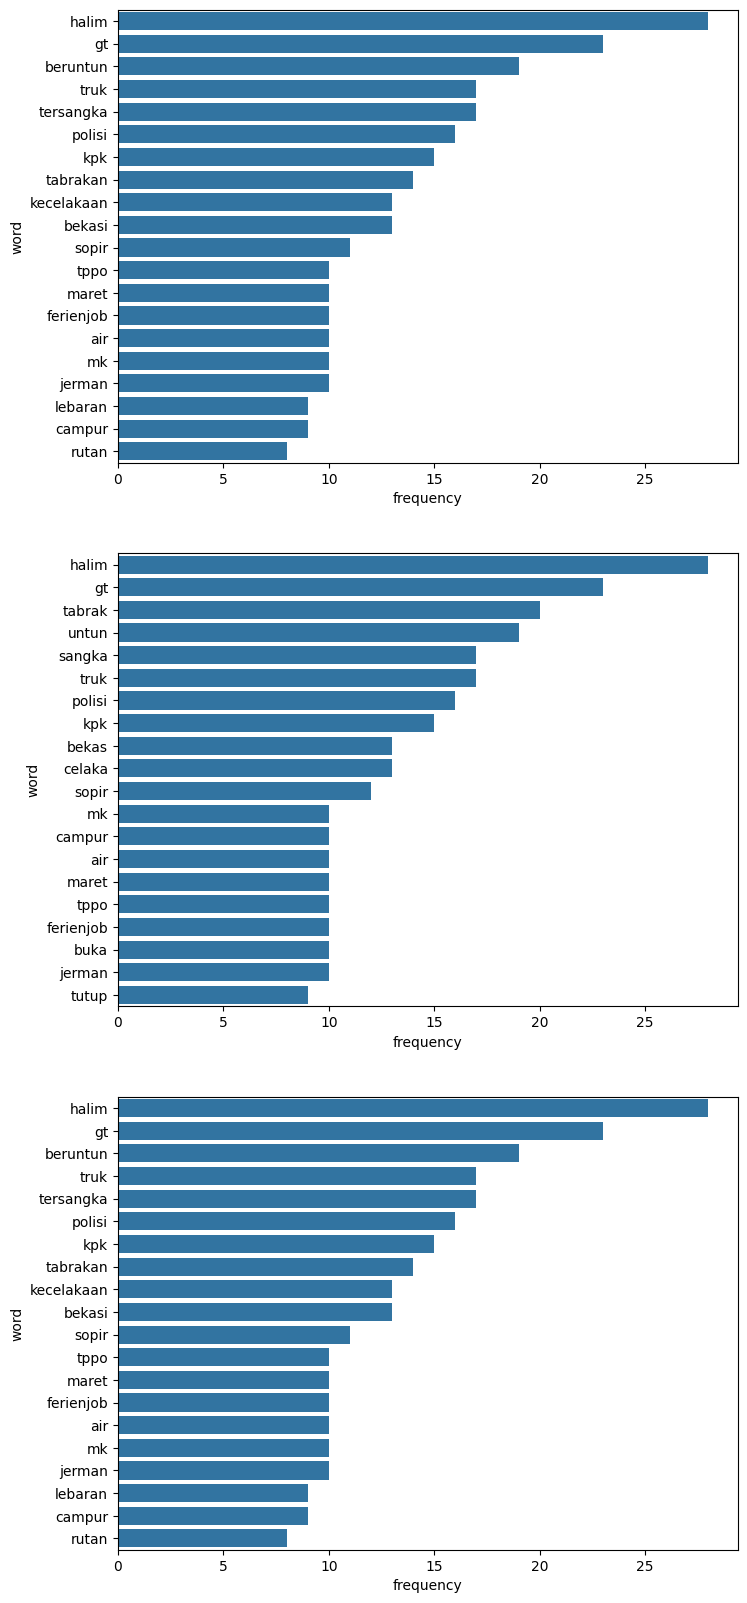

In [262]:
# create subplot of the different unigram token judul data frames
fig, axes = plt.subplots( 3, 1, figsize=( 8, 20 ) )
sns.barplot( ax=axes[0], x='frequency', y='word', data=unigram_eda1.head( 20 ) )
sns.barplot( ax=axes[1], x='frequency', y='word', data=unigram_eda2.head( 20 ) )
sns.barplot( ax=axes[2], x='frequency', y='word', data=unigram_eda3.head( 20 ) )


<Axes: xlabel='frequency', ylabel='pairs'>

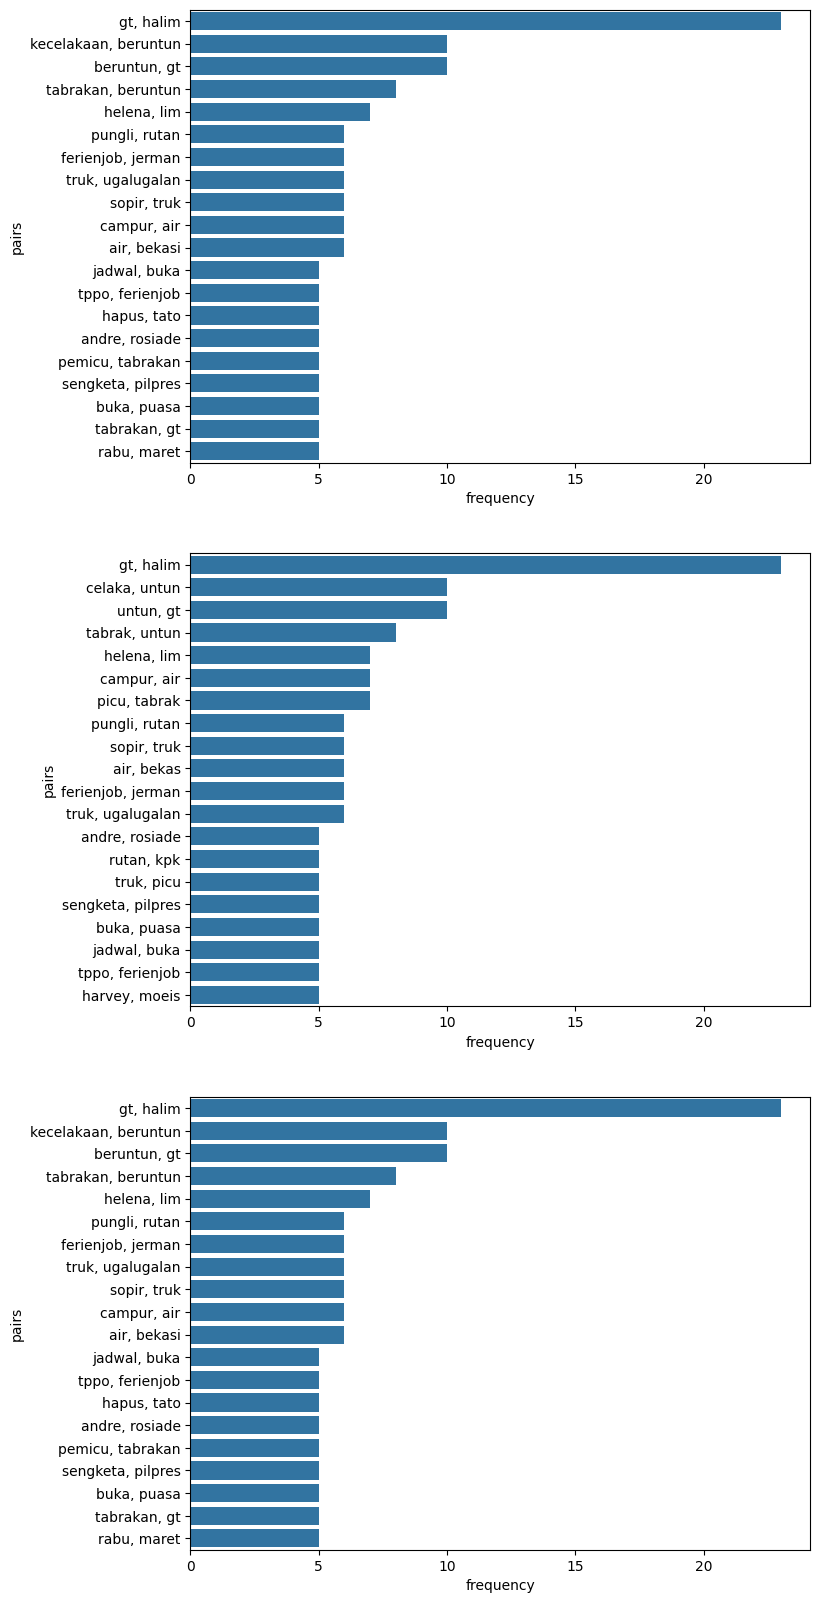

In [ ]:
# create subplot of the different bigram token judul data frames
fig, axes = plt.subplots( 3, 1, figsize=( 8, 20 ) )
sns.barplot( ax=axes[0], x='frequency', y='pairs', data=bigram_eda1.head( 20 ) )
sns.barplot( ax=axes[1], x='frequency', y='pairs', data=bigram_eda2.head( 20 ) )
sns.barplot( ax=axes[2], x='frequency', y='pairs', data=bigram_eda3.head( 20 ) )


<Axes: xlabel='frequency', ylabel='trigrams'>

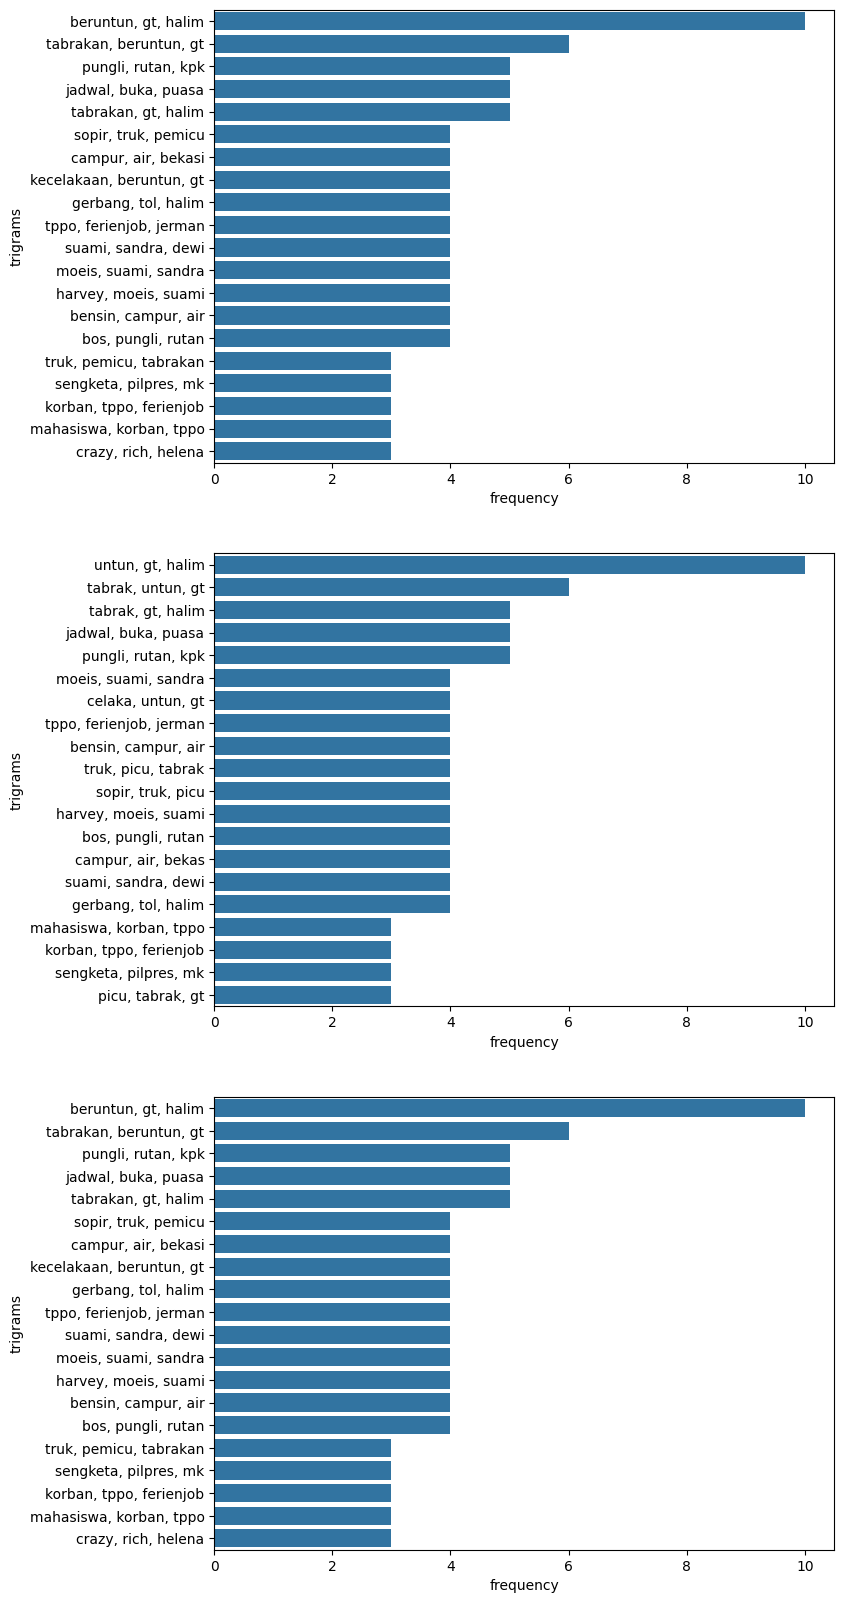

In [ ]:
# create subplot of the different trigram token judul data frames
fig, axes = plt.subplots( 3, 1, figsize=( 8, 20 ) )
sns.barplot( ax=axes[0], x='frequency', y='trigrams', data=trigram_eda1.head( 20 ) )
sns.barplot( ax=axes[1], x='frequency', y='trigrams', data=trigram_eda2.head( 20 ) )
sns.barplot( ax=axes[2], x='frequency', y='trigrams', data=trigram_eda3.head( 20 ) )


In [263]:
# for df eda 1 (token berita of lemmatization)
unigram_eda1, bigram_eda1, trigram_eda1 = word_frequency( df_eda_1['words_berita'] )

# for df eda 2 (token berita of stemming)
unigram_eda2, bigram_eda2, trigram_eda2 = word_frequency( df_eda_2['words_berita'] )

# for df eda 3 (token berita of stopwords)
unigram_eda3, bigram_eda3, trigram_eda3 = word_frequency( df_eda_3['words_berita'] )

<Axes: xlabel='frequency', ylabel='word'>

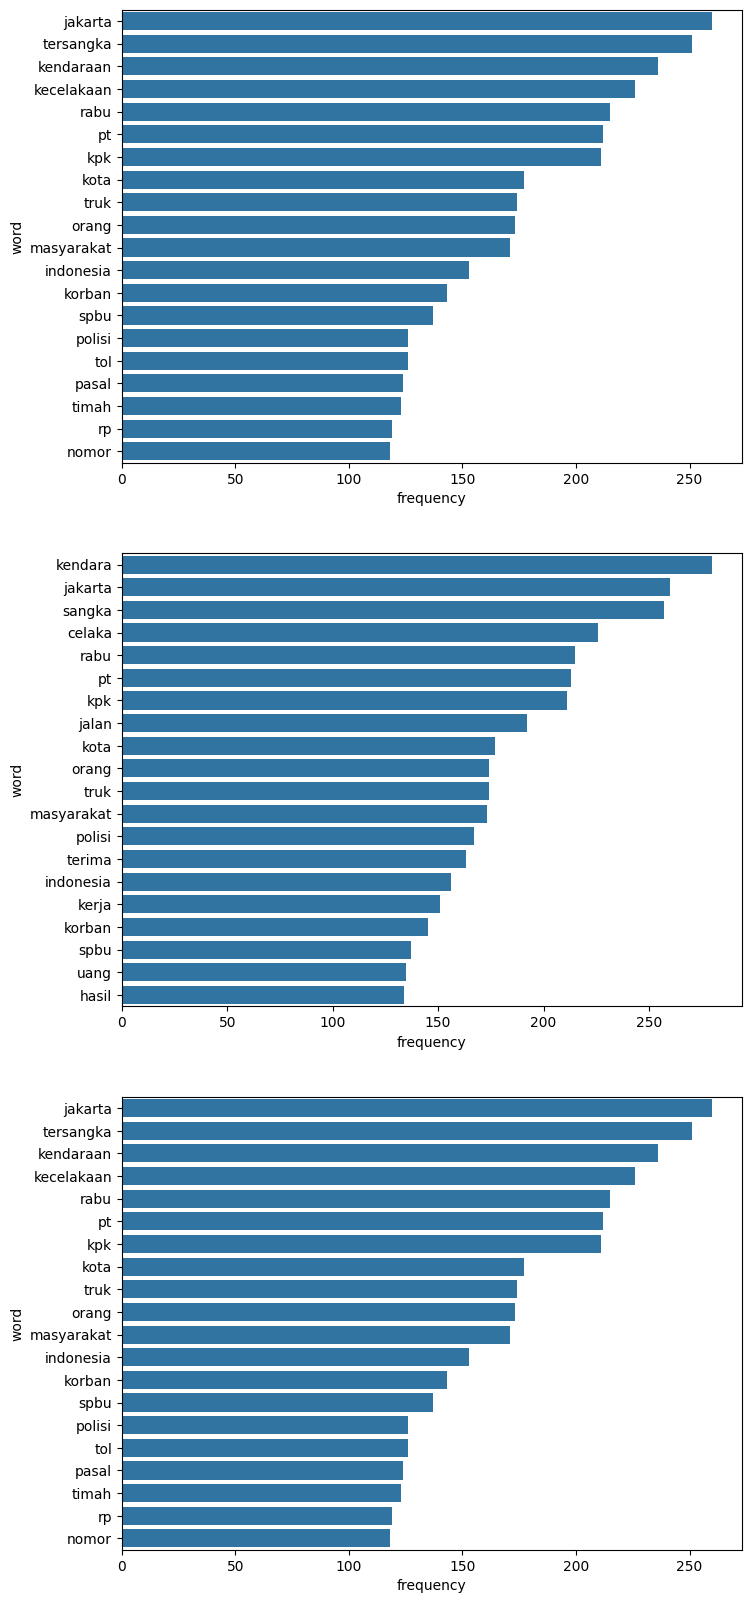

In [265]:
# create subplot of the different unigram token berita data frames
fig, axes = plt.subplots( 3, 1, figsize=( 8, 20 ) )
sns.barplot( ax=axes[0], x='frequency', y='word', data=unigram_eda1.head( 20 ) )
sns.barplot( ax=axes[1], x='frequency', y='word', data=unigram_eda2.head( 20 ) )
sns.barplot( ax=axes[2], x='frequency', y='word', data=unigram_eda3.head( 20 ) )


<Axes: xlabel='frequency', ylabel='pairs'>

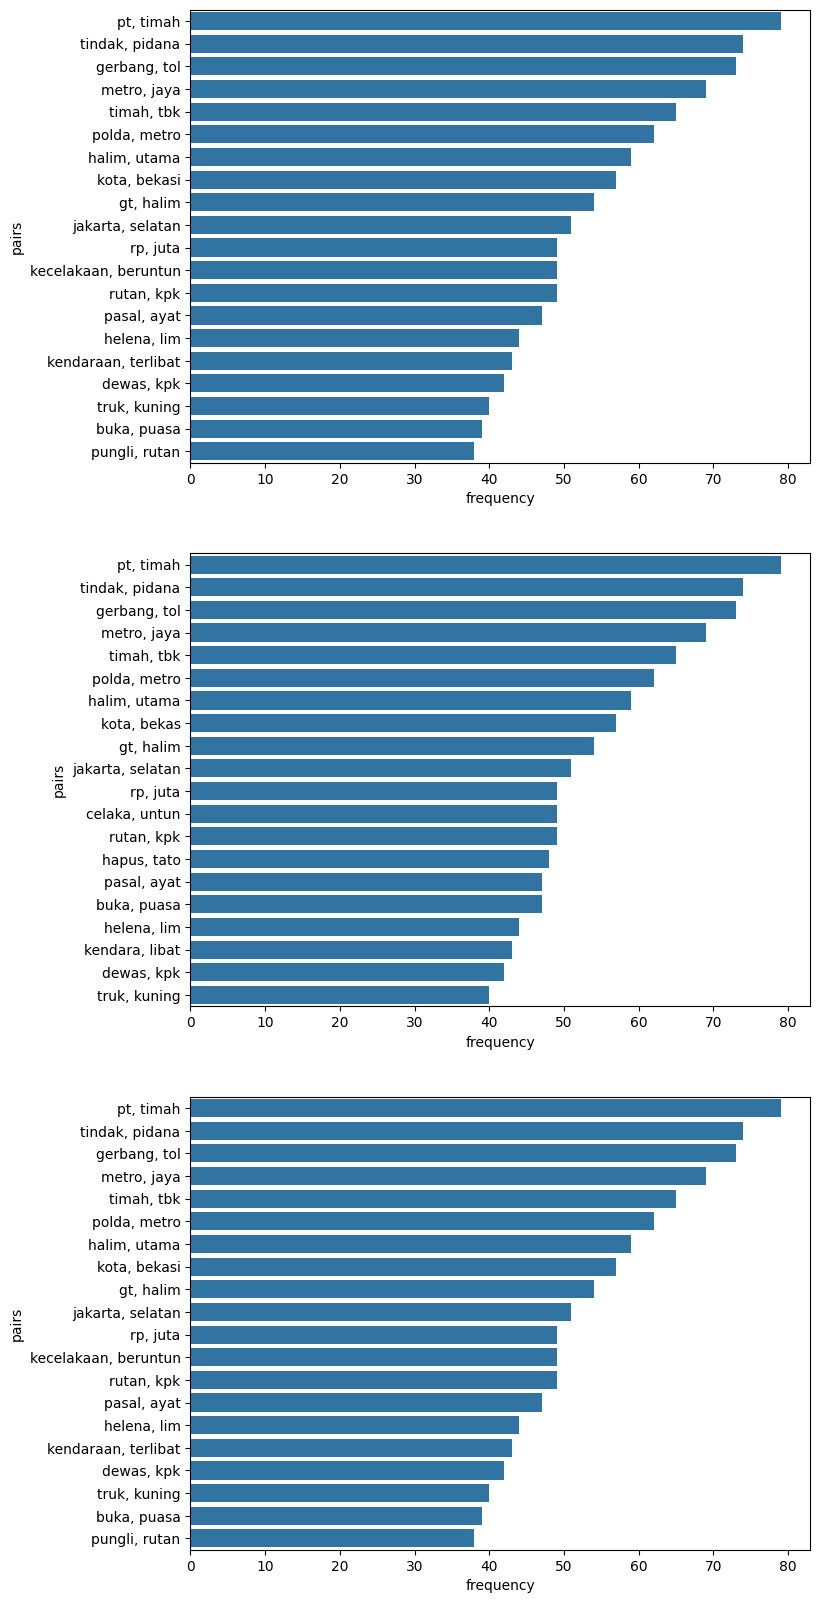

In [266]:
# create subplot of the different bigram token berita data frames
fig, axes = plt.subplots( 3, 1, figsize=( 8, 20 ) )
sns.barplot( ax=axes[0], x='frequency', y='pairs', data=bigram_eda1.head( 20 ) )
sns.barplot( ax=axes[1], x='frequency', y='pairs', data=bigram_eda2.head( 20 ) )
sns.barplot( ax=axes[2], x='frequency', y='pairs', data=bigram_eda3.head( 20 ) )


<Axes: xlabel='frequency', ylabel='trigrams'>

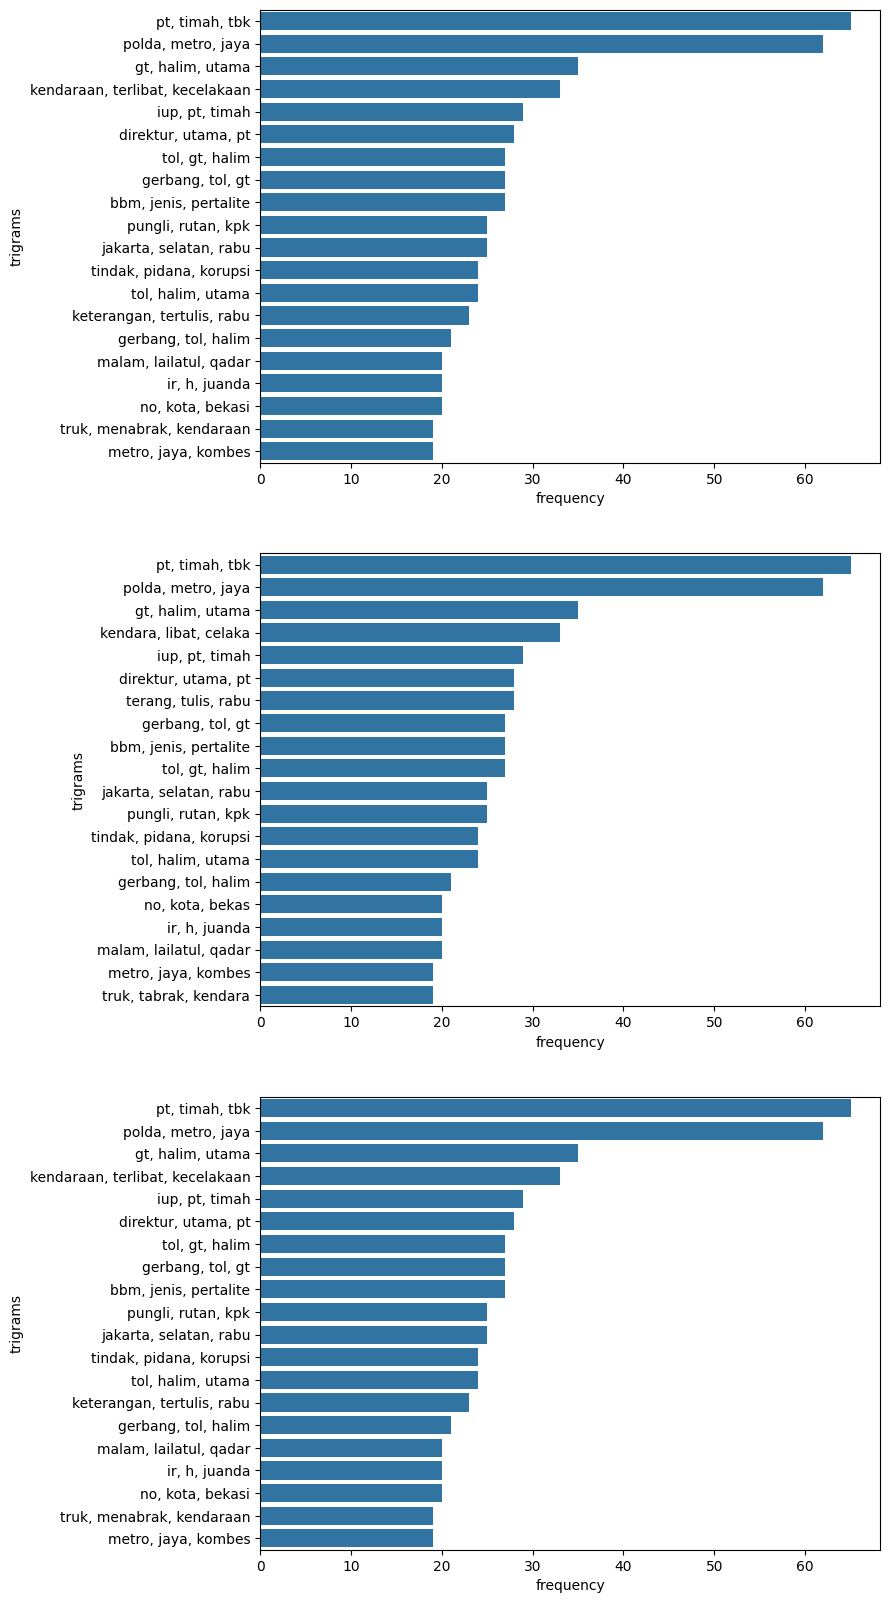

In [267]:
# create subplot of the different trigram token berita data frames
fig, axes = plt.subplots( 3, 1, figsize=( 8, 20 ) )
sns.barplot( ax=axes[0], x='frequency', y='trigrams', data=trigram_eda1.head( 20 ) )
sns.barplot( ax=axes[1], x='frequency', y='trigrams', data=trigram_eda2.head( 20 ) )
sns.barplot( ax=axes[2], x='frequency', y='trigrams', data=trigram_eda3.head( 20 ) )


4. Sentiment Analysis

4.1 get data

In [ ]:
import ast

# Custom converter function to safely parse list values
def parse_list( s ):
    try:
        return ast.literal_eval( s )
    except ( SyntaxError, ValueError ):
        return None  # Handle invalid list representations
    # end try
# end function


# try to open previous saved pre processed data
import numpy as np
import pandas as pd

# open file to get the data
df_pre = pd.read_csv( 'news_data_03272024-preprocessed.csv', converters={ "stopremoved_judul": parse_list,
                                                                        "stopremoved_berita": parse_list,
                                                                        "lemma_judul": parse_list,
                                                                        "lemma_berita": parse_list,
                                                                        "stemming_judul": parse_list,
                                                                        "stemming_berita": parse_list
                                                                        } )

# create new dataframe for lemma pre processed data
df_sentiment = pd.DataFrame()
df_sentiment[ 'lemma_judul' ]    = df_pre[ 'lemma_judul' ].copy()
df_sentiment[ 'lemma_berita' ]   = df_pre[ 'lemma_berita' ].copy()

df_sentiment[ 'stemming_judul' ] = df_pre[ 'stemming_judul' ].copy()
df_sentiment[ 'stemming_berita' ]= df_pre[ 'stemming_berita' ].copy()

df_sentiment[ 'cleaned_judul' ]  = df_pre[ 'stopremoved_judul' ].copy()
df_sentiment[ 'cleaned_berita' ] = df_pre[ 'stopremoved_berita' ].copy()

In [ ]:
df_sentiment

,lemma_judul,lemma_berita,stemming_judul,stemming_berita,cleaned_judul,cleaned_berita
0,"[kejagung, kaitan, harvey, moeis, helena, lim,...","[kejaksaan, agung, kejagung, peran, suami, akt...","[jagung, kait, harvey, moeis, helena, lim, timah]","[jaksa, agung, jagung, peran, suami, aktris, s...","[kejagung, kaitan, harvey, moeis, helena, lim,...","[kejaksaan, agung, kejagung, peran, suami, akt..."
1,"[menko, polhukam, bentuk, tim, khusus, tangani...","[menko, polhukam, hadi, tjahjanto, jajaran, le...","[menko, polhukam, bentuk, tim, khusus, tangan,...","[menko, polhukam, had, tjahjanto, jajar, lemba...","[menko, polhukam, bentuk, tim, khusus, tangani...","[menko, polhukam, hadi, tjahjanto, jajaran, le..."
2,"[petani, musi, banyuasin, tewas, diterkam, bua...","[samsudin, petani, musi, banyuasin, sumatera, ...","[tani, mus, banyuasin, tewas, terkam, buaya, w...","[samsudin, tani, mus, banyuasin, sumatera, sel...","[petani, musi, banyuasin, tewas, diterkam, bua...","[samsudin, petani, musi, banyuasin, sumatera, ..."
3,"[waka, mpr, upaya, antisipasi, gangguan, mudik...","[wakil, ketua, mpr, ri, lestari, moerdijat, me...","[waka, mpr, upaya, antisipasi, ganggu, mudik, ...","[wakil, ketua, mpr, ri, lestari, moerdijat, se...","[waka, mpr, upaya, antisipasi, gangguan, mudik...","[wakil, ketua, mpr, ri, lestari, moerdijat, me..."
4,"[balasbalas, wa, pria, mampang, ditemukan, tew...","[pria, bernama, sandy, yuda, ditemukan, tewas,...","[balasbalas, wa, pria, mampang, temu, tewas, k...","[pria, nama, sandy, yuda, temu, tewas, koskosa...","[balasbalas, wa, pria, mampang, ditemukan, tew...","[pria, bernama, sandy, yuda, ditemukan, tewas,..."
...,...,...,...,...,...,...
204,"[komisi, x, dpr, panggil, kemendikbud, tppo, m...","[wakil, ketua, komisi, x, dpr, ri, dede, yusuf...","[komisi, x, dpr, panggil, kemendikbud, tppo, m...","[wakil, ketua, komisi, x, dpr, ri, dede, yusuf...","[komisi, x, dpr, panggil, kemendikbud, tppo, m...","[wakil, ketua, komisi, x, dpr, ri, dede, yusuf..."
205,"[fakta, penipuan, modus, haji, furoda, backpac...","[perempuan, berinisial, sja, ditangkap, polda,...","[fakta, tipu, modus, haji, furoda, backpacker,...","[perempuan, inisial, sja, tangkap, polda, metr...","[fakta, penipuan, modus, haji, furoda, backpac...","[perempuan, berinisial, sja, ditangkap, polda,..."
206,"[hotline, rim, polri, warga, seputar, penerima...","[asisten, staf, sumber, daya, manusia, a, sdm,...","[hotline, rim, polri, warga, putar, terima, an...","[asisten, staf, sumber, daya, manusia, as, sdm...","[hotline, rim, polri, warga, seputar, penerima...","[asisten, staf, sumber, daya, manusia, as, sdm..."
207,"[pekerja, migran, mudik, indonesia, lebaran]","[pekerja, migran, mudik, lebaran, pulang, indo...","[kerja, migran, mudik, indonesia, lebaran]","[kerja, migran, mudik, lebaran, pulang, indone...","[pekerja, migran, mudik, indonesia, lebaran]","[pekerja, migran, mudik, lebaran, pulang, indo..."


4.2 set sentiment calculation function

In [ ]:
from textblob import TextBlob

sentiment_cateogry_list =[ "positive", "neutral", "negative" ]

# to get sentiment polarity
def getSentimentValue( text ):
  # analyze the input
  analysis = TextBlob( text )
  sentiment = analysis.sentiment.polarity

  # decide the sentimen ppolarity score
  if sentiment > 0:
    return sentiment_cateogry_list[0]
  elif sentiment < 0:
    return sentiment_cateogry_list[2]
  else:
    return sentiment_cateogry_list[1]
  # end if
# end function

4.3 get sentiment value from df lemma judul

In [ ]:
df_sentiment['merged_lemma_judul']    = df_sentiment[ 'lemma_judul' ].apply( lambda words: " ".join( words ) ).copy()
df_sentiment['sentiment_lemma_judul'] = df_sentiment[ 'merged_lemma_judul' ].apply( getSentimentValue ).copy()
df_sentiment['sentiment_lemma_judul'].value_counts()

neutral     204
negative      5
Name: sentiment_lemma_judul, dtype: int64

In [ ]:
# Filter the DataFrame to get data for the specified category
# Filter the DataFrame and select specific columns
df_sentiment.loc[ df_sentiment['sentiment_lemma_judul'] == sentiment_cateogry_list[2], [ 'lemma_judul', 'merged_lemma_judul', 'sentiment_lemma_judul' ] ]

,lemma_judul,merged_lemma_judul,sentiment_lemma_judul
103,"[detikdetik, helena, lim, pakai, rompi, tahana...",detikdetik helena lim pakai rompi tahanan pink...,negative
122,"[tumpukan, duit, rp, m, disita, jaksa, crazy, ...",tumpukan duit rp m disita jaksa crazy rich hel...,negative
150,"[kelompok, remaja, soreang, keroyok, pria, ket...",kelompok remaja soreang keroyok pria keterbela...,negative
189,"[dalih, salurkan, csr, bikin, crazy, rich, hel...",dalih salurkan csr bikin crazy rich helena lim...,negative
195,"[crazy, rich, helena, lim, tersangka, duit, mi...",crazy rich helena lim tersangka duit miliaran ...,negative


In [ ]:
df_sentiment['merged_lemma_berita']    = df_sentiment[ 'lemma_berita' ].apply( lambda words: " ".join( words ) ).copy()
df_sentiment['sentiment_lemma_berita'] = df_sentiment[ 'merged_lemma_berita' ].apply( getSentimentValue ).copy()
df_sentiment['sentiment_lemma_berita'].value_counts()

neutral     154
negative     33
positive     22
Name: sentiment_lemma_berita, dtype: int64

In [ ]:
# Filter the DataFrame to get data for the specified category
# Filter the DataFrame and select specific columns
df_sentiment.loc[ df_sentiment['sentiment_lemma_berita'] == sentiment_cateogry_list[0], [ 'lemma_berita', 'merged_lemma_berita', 'sentiment_lemma_berita' ] ].head( 5 )

,lemma_berita,merged_lemma_berita,sentiment_lemma_berita
3,"[wakil, ketua, mpr, ri, lestari, moerdijat, me...",wakil ketua mpr ri lestari moerdijat menyebut ...,positive
5,"[kejaksaan, agung, kejagung, menetapkan, suami...",kejaksaan agung kejagung menetapkan suami arti...,positive
60,"[kecelakaan, beruntun, gerbang, tol, gt, halim...",kecelakaan beruntun gerbang tol gt halim utama...,positive
61,"[direktorat, lintas, polda, jawa, barat, siste...",direktorat lintas polda jawa barat sistem cont...,positive
91,"[tim, hukum, timnas, amin, mengajukan, permoho...",tim hukum timnas amin mengajukan permohonan gu...,positive


In [ ]:
# Filter the DataFrame to get data for the specified category
# Filter the DataFrame and select specific columns
df_sentiment.loc[ df_sentiment['sentiment_lemma_berita'] == sentiment_cateogry_list[1], [ 'lemma_berita', 'merged_lemma_berita', 'sentiment_lemma_berita' ] ].head( 5 )

,lemma_berita,merged_lemma_berita,sentiment_lemma_berita
1,"[menko, polhukam, hadi, tjahjanto, jajaran, le...",menko polhukam hadi tjahjanto jajaran lembaga ...,neutral
2,"[samsudin, petani, musi, banyuasin, sumatera, ...",samsudin petani musi banyuasin sumatera selata...,neutral
4,"[pria, bernama, sandy, yuda, ditemukan, tewas,...",pria bernama sandy yuda ditemukan tewas koskos...,neutral
7,"[wakil, menteri, agraria, tata, ruangbadan, pe...",wakil menteri agraria tata ruangbadan pertanah...,neutral
8,"[polisi, menetapkan, orang, tersangka, bbm, di...",polisi menetapkan orang tersangka bbm dicampur...,neutral


In [ ]:
# Filter the DataFrame to get data for the specified category
# Filter the DataFrame and select specific columns
df_sentiment.loc[ df_sentiment['sentiment_lemma_berita'] == sentiment_cateogry_list[2], [ 'lemma_berita', 'merged_lemma_berita', 'sentiment_lemma_berita' ] ].head( 5 )

,lemma_berita,merged_lemma_berita,sentiment_lemma_berita
0,"[kejaksaan, agung, kejagung, peran, suami, akt...",kejaksaan agung kejagung peran suami aktris sa...,negative
6,"[kejaksaan, agung, kejagung, menetapkan, suami...",kejaksaan agung kejagung menetapkan suami aktr...,negative
9,"[kejaksaan, agung, kejagung, menetapkan, suami...",kejaksaan agung kejagung menetapkan suami aktr...,negative
10,"[anak, buah, mantan, menkominfo, johnny, g, pl...",anak buah mantan menkominfo johnny g plate did...,negative
13,"[kejaksaan, agung, kejagung, menetapkan, suami...",kejaksaan agung kejagung menetapkan suami aktr...,negative


4.4 get sentiment value from df stemming judul

In [ ]:
df_sentiment['merged_stemming_judul']    = df_sentiment[ 'stemming_judul' ].apply( lambda words: " ".join( words ) ).copy()
df_sentiment['sentiment_stemming_judul'] = df_sentiment[ 'merged_stemming_judul' ].apply( getSentimentValue ).copy()
df_sentiment['sentiment_stemming_judul'].value_counts()

neutral     203
negative      6
Name: sentiment_stemming_judul, dtype: int64

In [ ]:
# Filter the DataFrame to get data for the specified category
# Filter the DataFrame and select specific columns
df_sentiment.loc[ df_sentiment['sentiment_stemming_judul'] == sentiment_cateogry_list[2], [ 'stemming_judul', 'merged_stemming_judul', 'sentiment_stemming_judul' ] ]

,stemming_judul,merged_stemming_judul,sentiment_stemming_judul
47,"[alas, pemprov, dki, tutup, jlnt, casablanca, ...",alas pemprov dki tutup jlnt casablanca malam b...,negative
103,"[detikdetik, helena, lim, pakai, rompi, tahan,...",detikdetik helena lim pakai rompi tahan pink b...,negative
122,"[tumpu, duit, rp, m, sita, jaksa, crazy, rich,...",tumpu duit rp m sita jaksa crazy rich helena lim,negative
150,"[kelompok, remaja, soreang, keroyok, pria, bel...",kelompok remaja soreang keroyok pria belakang ...,negative
189,"[dalih, salur, csr, bikin, crazy, rich, helena...",dalih salur csr bikin crazy rich helena lim je...,negative
195,"[crazy, rich, helena, lim, sangka, duit, milia...",crazy rich helena lim sangka duit miliar rumah...,negative


In [ ]:
df_sentiment['merged_stemming_berita']    = df_sentiment[ 'stemming_berita' ].apply( lambda words: " ".join( words ) ).copy()
df_sentiment['sentiment_stemming_berita'] = df_sentiment[ 'merged_stemming_berita' ].apply( getSentimentValue ).copy()
df_sentiment['sentiment_stemming_berita'].value_counts()

neutral     142
negative     44
positive     23
Name: sentiment_stemming_berita, dtype: int64

In [ ]:
# Filter the DataFrame to get data for the specified category
# Filter the DataFrame and select specific columns
df_sentiment.loc[ df_sentiment['sentiment_stemming_berita'] == sentiment_cateogry_list[0], [ 'stemming_berita', 'merged_stemming_berita', 'sentiment_stemming_berita' ] ].head( 5 )

,stemming_berita,merged_stemming_berita,sentiment_stemming_berita
3,"[wakil, ketua, mpr, ri, lestari, moerdijat, se...",wakil ketua mpr ri lestari moerdijat sebut upa...,positive
5,"[jaksa, agung, jagung, tetap, suami, artis, sa...",jaksa agung jagung tetap suami artis sandra de...,positive
60,"[celaka, untun, gerbang, tol, gt, halim, utama...",celaka untun gerbang tol gt halim utama rekam ...,positive
61,"[direktorat, lintas, polda, jawa, barat, siste...",direktorat lintas polda jawa barat sistem cont...,positive
121,"[bea, cukai, langsa, aman, kendara, angkut, ro...",bea cukai langsa aman kendara angkut rokok ile...,positive


4.5 get sentiment value from df cleaned judul

In [ ]:
df_sentiment['merged_cleaned_judul']    = df_sentiment[ 'cleaned_judul' ].apply( lambda words: " ".join( words ) ).copy()
df_sentiment['sentiment_cleaned_judul'] = df_sentiment[ 'merged_cleaned_judul' ].apply( getSentimentValue ).copy()
df_sentiment['sentiment_cleaned_judul'].value_counts()

neutral     204
negative      5
Name: sentiment_cleaned_judul, dtype: int64

In [ ]:
# Filter the DataFrame to get data for the specified category
# Filter the DataFrame and select specific columns
df_sentiment.loc[ df_sentiment['sentiment_cleaned_judul'] == sentiment_cateogry_list[2], [ 'cleaned_judul', 'merged_cleaned_judul', 'sentiment_cleaned_judul' ] ]

,cleaned_judul,merged_cleaned_judul,sentiment_cleaned_judul
103,"[detikdetik, helena, lim, pakai, rompi, tahana...",detikdetik helena lim pakai rompi tahanan pink...,negative
122,"[tumpukan, duit, rp, m, disita, jaksa, crazy, ...",tumpukan duit rp m disita jaksa crazy rich hel...,negative
150,"[kelompok, remaja, soreang, keroyok, pria, ket...",kelompok remaja soreang keroyok pria keterbela...,negative
189,"[dalih, salurkan, csr, bikin, crazy, rich, hel...",dalih salurkan csr bikin crazy rich helena lim...,negative
195,"[crazy, rich, helena, lim, tersangka, duit, mi...",crazy rich helena lim tersangka duit miliaran ...,negative


In [ ]:
df_sentiment['merged_cleaned_berita']    = df_sentiment[ 'cleaned_berita' ].apply( lambda words: " ".join( words ) ).copy()
df_sentiment['sentiment_cleaned_berita'] = df_sentiment[ 'merged_cleaned_berita' ].apply( getSentimentValue ).copy()
df_sentiment['sentiment_cleaned_berita'].value_counts()

neutral     155
negative     31
positive     23
Name: sentiment_cleaned_berita, dtype: int64

4.6 Save sentiment values into new files

In [ ]:
import pandas as pd
import csv

# selected dataframe
getData2 = df_sentiment.copy()

# export pre processed data into excel file
getData2.to_excel( 'news_data_03272024-sentimen_analysis.xlsx', index=False )

# export pre processed collected data into csv file
getData2.to_csv( 'news_data_03272024-sentimen_analysis.csv', index=False )

5. Machine Learning Model

ref: https://python.plainenglish.io/text-mining-in-python-steps-and-examples-645b16c6bc5d

5.1 set text classification machine learning in form of function

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# to make a simple text classification machine learning
def simpleTextClassificationMachine( texts, labels ):
  # Vectorize text data
  vectorizer = TfidfVectorizer()
  X = vectorizer.fit_transform( texts )

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split( X, labels, test_size=0.4, random_state=42 )

  # Train a classifier
  classifier = MultinomialNB()
  classifier.fit( X_train, y_train )

  # Make predictions
  y_pred = classifier.predict( X_test )

  # Calculate accuracy
  accuracy = accuracy_score( y_test, y_pred )
  print(f"Accuracy: { accuracy }")
# end function

5.2 create ml for df lemma judul

In [ ]:
simpleTextClassificationMachine( df_sentiment['merged_lemma_judul'].copy(), df_sentiment['sentiment_lemma_judul'].copy() )

Accuracy: 0.9761904761904762


In [ ]:
simpleTextClassificationMachine( df_sentiment['merged_lemma_berita'].copy(), df_sentiment['sentiment_lemma_berita'].copy() )

Accuracy: 0.7738095238095238


5.3 create ml for df stemming judul

In [ ]:
simpleTextClassificationMachine( df_sentiment['merged_stemming_judul'].copy(), df_sentiment['sentiment_stemming_judul'].copy() )

Accuracy: 0.9761904761904762


In [ ]:
simpleTextClassificationMachine( df_sentiment['merged_stemming_berita'].copy(), df_sentiment['sentiment_stemming_berita'].copy() )

Accuracy: 0.7380952380952381


5.4 create ml for df cleaned judul

In [ ]:
simpleTextClassificationMachine( df_sentiment['merged_cleaned_judul'].copy(), df_sentiment['sentiment_cleaned_judul'].copy() )

Accuracy: 0.9761904761904762


In [ ]:
simpleTextClassificationMachine( df_sentiment['merged_cleaned_berita'].copy(), df_sentiment['sentiment_cleaned_berita'].copy() )

Accuracy: 0.7857142857142857
